<a href="https://colab.research.google.com/github/adimnicky/Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community
!pip install replicate
!pip install pandas

In [5]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
import pandas as pd

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

# Load dataset from CSV
df = pd.read_csv("Tweets.csv")

In [6]:
# Define a function to split the list into batches
def batch_list(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Define the batch size (adjust as needed based on the model's context window)
batch_size = 100 # You can adjust this number

# Create batches of reviews
# Assuming 'text' column contains the reviews
review_batches = list(batch_list(df['text'], batch_size))

# Process each batch and store the responses
responses = []
for i, batch in enumerate(review_batches):
    reviews_text_batch = "\n".join([f"Review {j+1}: {review}" for j, review in enumerate(batch)])

    if 'prompt_template' in locals() or 'prompt_template' in globals():
        prompt_batch = prompt_template.format(reviews_text_batch=reviews_text_batch)
    else:
        prompt_batch = f"Analyze the following reviews:\n{reviews_text_batch}"

    print(f"Processing batch {i+1}/{len(review_batches)}...")
    print(f"Prompt length: {len(prompt_batch)} characters")

    try:
        response_batch = output.invoke(prompt_batch)
        responses.append(response_batch)
    except RuntimeError as e:
        print(f"Batch {i+1} failed: {e}")
        responses.append(f"[ERROR] {e}")
        continue

# Combine the responses (this will depend on the desired output format)
# For now, let's just print each response
for i, response in enumerate(responses):
    print(f"\nResponse for batch {i+1}:\n")
    print(response)

Processing batch 1/147...
Prompt length: 11224 characters
Processing batch 2/147...
Prompt length: 11829 characters
Processing batch 3/147...
Prompt length: 10736 characters
Processing batch 4/147...
Prompt length: 11110 characters
Processing batch 5/147...
Prompt length: 10671 characters
Processing batch 6/147...
Prompt length: 11831 characters
Processing batch 7/147...
Prompt length: 11044 characters
Processing batch 8/147...
Prompt length: 11951 characters
Processing batch 9/147...
Prompt length: 11954 characters
Processing batch 10/147...
Prompt length: 11973 characters
Processing batch 11/147...
Prompt length: 12232 characters
Processing batch 12/147...
Prompt length: 11999 characters
Processing batch 13/147...
Prompt length: 11567 characters
Processing batch 14/147...
Prompt length: 11576 characters
Processing batch 15/147...
Prompt length: 11644 characters
Processing batch 16/147...
Prompt length: 11727 characters
Processing batch 17/147...
Prompt length: 11937 characters
Proces

In [7]:
# Define refined prompt
refined_prompt = f"""
Classify these reviews as positive, negative, or mixed, and tag
relevant categories (Delay, Rude service, or Lost baggage):
{response_batch}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

**Negative Experiences:**

1. **Delay**: Reviews 2, 3, 9, 22 (Long delays and wait times, including waiting for luggage after a lengthy flight)
2. **Delay**: Reviews 4, 7, 17, 34 (Flight cancellations without adequate notice or communication)
3. **Customer Service**: Reviews 6, 20, 25, 30 (Inability to reach customer service for assistance)
4. **Rude Service**: Review 10 (Rude or unhelpful staff)
5. **Lost Baggage/Accommodation**: Reviews 13, 23 (Disappointment with airport accommodations and lack of support for stranded passengers)
6. **Weight Restrictions**: Review 19 (Complaints about the airline's handling of weight restrictions leading to passenger removals)
7. **In-flight Issues**: Review 24 (Issues with in-flight amenities not functioning properly)
8. **Response to Disruptions**: Reviews 25, 31, 39 (Dissatisfaction with the airline's response to flight disruptions, including perceived unfair treatment)
9. **Delayed Flights with No Updates**: Revi

In [8]:
# Define the prompt to complete the task in 2 steps
multitask_prompt = f"""
Complete the task in 2 steps.
Step 1: Classify these reviews as positive, negative, or mixed.
Step 2: For each review, identify relevant categories: Delay, Rude service, or Lost baggage.
{response_batch}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

**Step 1: Classification**

- **Negative Reviews:** 2, 3, 4, 6, 7, 9, 10, 13, 17, 19, 20, 22, 23, 24, 25, 30, 31, 34, 37, 39
- **Positive Reviews:** 26, 27
- **Mixed/Neutral Reviews:** 1, 3, 9, 11, 13, 14, 29, 30, 32, 36, 40

**Step 2: Categorization**

**Negative Reviews:**

1. **Review 2 (Delayed luggage):** Delay
2. **Review 3 (Rebooking issues):** Delay, Lost baggage
3. **Review 4 (Cancellation without notice):** Delay
4. **Review 6 (Inaccessible customer service):** Rude service
5. **Review 7 (Cancellation without notice):** Delay
6. **Review 9 (No updates on delays):** Delay
7. **Review 10 (Rude staff):** Rude service
8. **Review 13 (Lack of support for stranded passengers):** Rude service
9. **Review 17 (Cancellation without notice):** Delay
10. **Review 19 (Weight restriction issues):** Mixed (touching on service quality)
11. **Review 20 (Inaccessible customer service):** Rude service
12. **Review 22 (Long delays):** Delay
13. **Review 23 (Lack of suppo

In [9]:
# Define the example to guide the model
formatted_prompt = f"""
Classify these reviews as Positive, Negative, or Mixed, and tag
relevant categories. Use this format:
- Sentiment: [Sentiment]
- Categories: [Categories].
{response_batch}
"""
# Invoke the model with prompt
response = output.invoke(formatted_prompt)
# Print the response
print("Granite Model Formatted Response:\n")
print(response)

Granite Model Formatted Response:

- Sentiment: Negative
  - Categories: Flight delays, customer service accessibility, rude staff, airport accommodations, weight restrictions, in-flight amenities malfunction, response to disruptions, rebooking difficulties

- Sentiment: Positive
  - Categories: Smooth flights, helpful crew, customer relations assistance, new aircraft appreciation, issue resolution

- Sentiment: Neutral/Informational
  - Categories: Information requests, weather-related frustrations, technical issues with airline services


/tmp/ipython-input-12-2695798638.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='Set2')


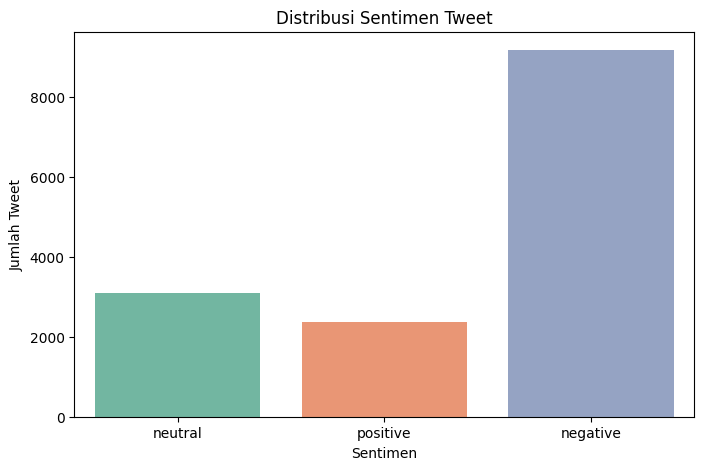

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Plot distribusi sentimen
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()
